In [ ]:
#Library untuk pengolahan data
import pandas as pd
import numpy as np

#Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

#Library untuk model Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Load data dan menampilkan data
df = pd.read_csv('/content/drive/MyDrive/Datasets/Dataset Kalbe Nutritional - Data Scientist - PBI - Latihan/Dataset CCV 5 - Supervised Learning Regression.csv')
df.head()

,Day,Diabetasol Coklat 1 kg,Fitbar Multigrain raisin 22 gram,Hydro Coco Original 500 ml,Slim & Fit Milk 312 gr,Daily Sales
0,1,7165158.0,115718.0,747417,7131950.0,20100380
1,2,11091106.0,302774.0,531021,4568946.0,19923983
2,3,3927138.0,150366.0,66812,2321753.0,10688946
3,4,1155500.0,74752.0,436916,NaN,4993264
4,5,6007919.0,370528.0,202243,3764485.0,14853006


In [ ]:
#Mendapatkan informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Day                               31 non-null     int64  
 1   Diabetasol Coklat 1 kg            30 non-null     float64
 2   Fitbar Multigrain raisin 22 gram  30 non-null     float64
 3   Hydro Coco Original 500 ml        31 non-null     int64  
 4   Slim & Fit Milk 312 gr            28 non-null     float64
 5   Daily Sales                       31 non-null     int64  
dtypes: float64(3), int64(3)
memory usage: 1.6 KB


In [ ]:
#Mendapatkan informasi karakteristik data
df.describe()

,Day,Diabetasol Coklat 1 kg,Fitbar Multigrain raisin 22 gram,Hydro Coco Original 500 ml,Slim & Fit Milk 312 gr,Daily Sales
count,31.000000,3.000000e+01,30.000000,3.100000e+01,2.800000e+01,3.100000e+01
mean,16.000000,7.650075e+06,203052.833333,5.852296e+05,2.784100e+06,1.452263e+07
std,9.092121,4.719969e+06,119893.843744,3.157644e+05,1.798318e+06,5.938896e+06
min,1.000000,6.946280e+05,56598.000000,3.374900e+04,2.419020e+05,2.847663e+06
25%,8.500000,4.046010e+06,117565.000000,3.251445e+05,1.182336e+06,1.018512e+07
50%,16.000000,7.396085e+06,154139.000000,5.478080e+05,3.124707e+06,1.485301e+07
75%,23.500000,1.143811e+07,251149.750000,8.573490e+05,3.804342e+06,1.964331e+07
max,31.000000,1.802751e+07,479724.000000,1.196453e+06,7.131950e+06,2.537055e+07


In [ ]:
#checking missing value
df.isna().sum()

Day                                 0
Diabetasol Coklat 1 kg              1
Fitbar Multigrain raisin 22 gram    1
Hydro Coco Original 500 ml          0
Slim & Fit Milk 312 gr              3
Daily Sales                         0
dtype: int64

<Figure size 1200x500 with 0 Axes>

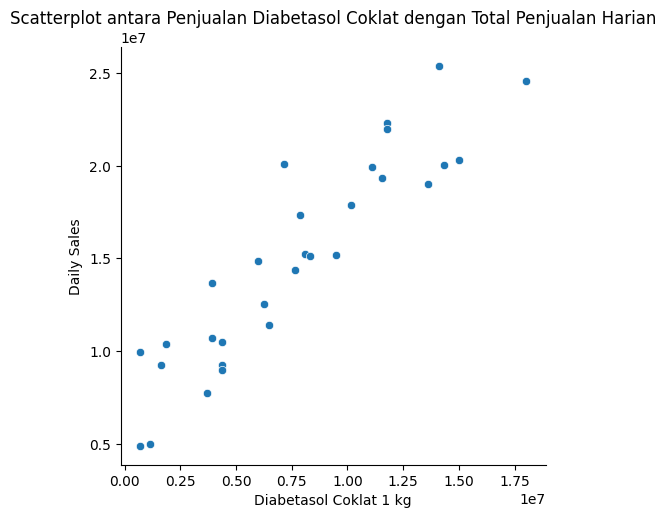

In [ ]:
# membuat visualisasi sebaran data
# antara variabel dependen salary
# dengan variabel independen years
# menggunakan grafik scatterplot
plt.figure(figsize=(12,5))
sns.pairplot(df,x_vars=['Diabetasol Coklat 1 kg'],y_vars=['Daily Sales'],height=5,kind='scatter')
plt.xlabel('Diabetasol Coklat 1 kg')
plt.ylabel('Daily Sales')
plt.title('Scatterplot antara Penjualan Diabetasol Coklat dengan Total Penjualan Harian')
plt.show()

In [ ]:
# Melakukan drop data dengan missing value pada kolom Diabetasol Coklat 1 kg
df.dropna(subset = 'Diabetasol Coklat 1 kg', inplace = True)

In [ ]:
# Menyimpan kolom total penjualan Diabetasol Coklat 1 kg ke variabel x sebagai variabel independen
X = df['Diabetasol Coklat 1 kg']
X.head()

0     7165158.0
1    11091106.0
2     3927138.0
3     1155500.0
4     6007919.0
Name: Diabetasol Coklat 1 kg, dtype: float64

In [ ]:
# Menyimpan kolom harga total penjualan harian ke variabel y sebagai variabel dependen
Y = df['Daily Sales']
Y.head()

0    20100380
1    19923983
2    10688946
3     4993264
4    14853006
Name: Daily Sales, dtype: int64

In [ ]:
# Membagi data menjadi data latih dan data uji
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.7,random_state=100)

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

X_train = X_train.reshape(X_train.shape[0],1)
X_test = X_test.reshape(X_test.shape[0],1)

In [ ]:
# Membangun model dan melakukan fit model ke data latih

# menyesuaikan garis regresi dengan sebaran data (fit)
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [ ]:
# Model melakukan prediksi
y_pred = lr.predict(X_test)

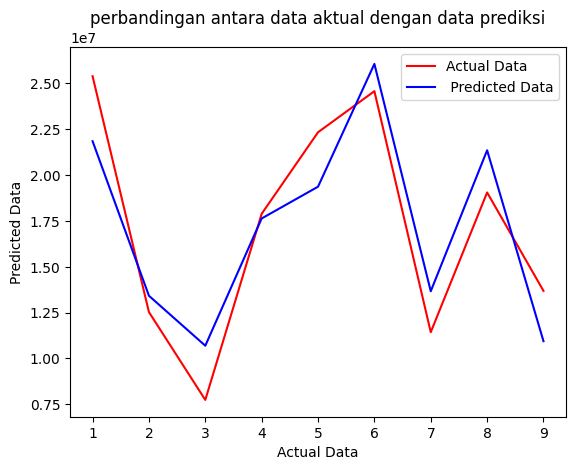

In [ ]:
# Melakukan prediksi pada data uji
# Membuat visualisasi untuk melihat perbandingan antara data aktual dengan data prediksi
c = [i for i in range (1,len(Y_test)+1,1)]
plt.plot(c,Y_test,color='r',linestyle='-', label = 'Actual Data ')
plt.plot(c,y_pred,color='b',linestyle='-', label = ' Predicted Data')
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.legend()
plt.title('perbandingan antara data aktual dengan data prediksi')
plt.show()

In [ ]:
# Metriks untuk evaluasi model (library)
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# Perhitungan Mean Square Error (untuk melihat performa model)
mse = mean_squared_error(Y_test,y_pred)
print('mean squared error', mse)

mean squared error 5646943705294.958


In [ ]:
# Intercept and coeff of the line (menampilkan gradien dan intersepsi)
# berhasil membuat model dan mendapatkan persamaan dalam membangun model
print('Intercept of the model;', lr.intercept_)
print('Coefficient of the line:',lr.coef_)

Intercept of the model; 6728389.623898853
Coefficient of the line: [1.0712553]


Kita berhasil membuat model regresi linear dengan persamaan:

y=1.07x+6728389.62